<a href="https://colab.research.google.com/github/LucasColas/Mountain-Car-Q-Learning/blob/main/MC_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

**Q Learning to solve Mountain Car**


episode :  0 score :  0 Epsilon : 1.0
episode :  100 score :  -1000.0 Epsilon : 0.9987500000000029
episode :  200 score :  -1000.0 Epsilon : 0.9975000000000058
episode :  300 score :  -1000.0 Epsilon : 0.9962500000000087
episode :  400 score :  -1000.0 Epsilon : 0.9950000000000117
episode :  500 score :  -1000.0 Epsilon : 0.9937500000000146
episode :  600 score :  -1000.0 Epsilon : 0.9925000000000175
episode :  700 score :  -1000.0 Epsilon : 0.9912500000000204
episode :  800 score :  -1000.0 Epsilon : 0.9900000000000233
episode :  900 score :  -1000.0 Epsilon : 0.9887500000000262
episode :  1000 score :  -1000.0 Epsilon : 0.9875000000000291
episode :  1100 score :  -1000.0 Epsilon : 0.986250000000032
episode :  1200 score :  -1000.0 Epsilon : 0.985000000000035
episode :  1300 score :  -1000.0 Epsilon : 0.9837500000000379
episode :  1400 score :  -1000.0 Epsilon : 0.9825000000000408
episode :  1500 score :  -1000.0 Epsilon : 0.9812500000000437
episode :  1600 score :  -1000.0 Epsilon : 

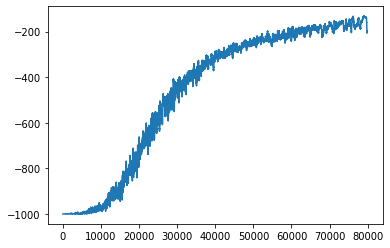

max :  -97.0
good episodes {71864: -97.0, 74419: -109.0, 75384: -105.0, 75387: -106.0, 75406: -98.0, 76064: -109.0, 76068: -109.0, 76077: -108.0}


In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np


env_name = "MountainCar-v0"
env = gym.make(env_name)
#env.reset()
#obs_, reward,done, _ = env.step(1)
#print(obs_)
#print(env.observation_space.high)
#print(env.observation_space.low)

Alpha = 0.19
Gamma = 0.98
Eps = 1.0

pos_chunk = np.linspace(env.observation_space.low[0], env.observation_space.high[0],30)
vel_chunk = np.linspace(env.observation_space.low[1], env.observation_space.high[1], 30)

def get_discrete_state(state):
    pos_dis = np.digitize(state[0], pos_chunk)
    vel_dis = np.digitize(state[1], vel_chunk)
    return (pos_dis, vel_dis)

def create_Q_table():
    Q = {}
    states = []

    for i in range(len(pos_chunk)):
        for j in range(len(vel_chunk)):
            states.append((i,j))

    for state in states:
        for action in range(3):
            Q[state,action] = 0

    return Q

def get_best_action(state,Q):
    actions = np.array([Q[state,action] for action in range(3)])
    best_action = np.argmax(actions)

    return best_action

def main(env,Alpha,Gamma,Eps,ep=80000):

    max = -1000
    good_episodes_values = {}

    epsilon_decay = 1/ep
    stock_rewards = np.zeros(ep+1)
    Q = create_Q_table()


    env._max_episode_steps = 1000

    score = 0
    for i in range(ep+1):
        done = False
        if i % 100 == 0:
            print("episode : ", i, "score : ", score, "Epsilon :", Eps)

        state = env.reset()
        #print(state.dtype)
        state_dis = get_discrete_state(state)
        score = 0

        while not done:
            if np.random.random() > Eps:
                action = get_best_action(state_dis,Q)
            else:
                action = np.random.choice([0,1,2])
            new_state, reward, done, info = env.step(action)
            new_state_dis = get_discrete_state(new_state)
            score += reward
            new_action = get_best_action(new_state_dis, Q)
            #print(Q[state_dis,action])
            Q[state_dis, action] = Q[state_dis,action] + Alpha*(reward + Gamma*Q[new_state_dis, new_action] - Q[state_dis,action])
            state_dis = new_state_dis
        stock_rewards[i] = score

        if score > max:
          max = score
        if score > -110:
          good_episodes_values[i] = score


        if Eps > 0.01:
            Eps -= epsilon_decay
        else:
            Eps = 0.01
    Visualize(ep,stock_rewards)
    print("max : ", max)
    print("good episodes", good_episodes_values)


    env.close()

def Visualize(ep,stock_rewards):
    mean_r = np.zeros(ep-100)
    for i in range(ep-100):
        #print(i)
        mean_r[i] = np.mean(stock_rewards[i:i+101])

    plt.plot(mean_r)
    plt.show()


main(env, Alpha,Gamma,Eps)